In [1]:
#PREDICTING BIKE DEMAND-TIME SERIES ANALYSIS
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#logistic regression
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
import os
os.chdir
#logistic regression
import statsmodels.discrete.discrete_model as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['figure.figsize'] = (10,6)

In [2]:
os.chdir('/home/ozlem/SPICED/EXERCISES/week3/data')

In [5]:
df_bike=pd.read_csv('train.csv', parse_dates=['datetime'])
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
df_bike['hour']=df_bike.datetime.dt.hour
df_bike['month']=df_bike.datetime.dt.month
df_bike['year']=df_bike.datetime.dt.year
#df_bike['month_count'] = df_bike['month']+df_bike['year']*12
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


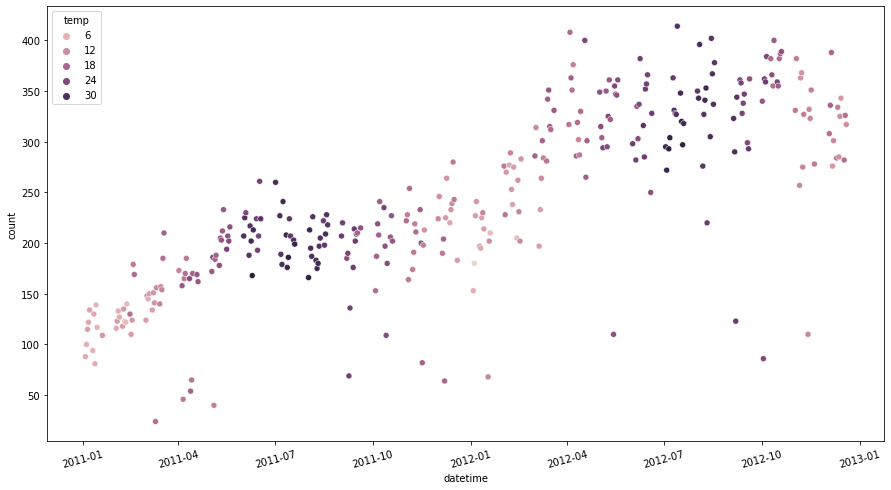

In [7]:
plt.figure(figsize=(15,8))#
sns.scatterplot(data =df_bike[(df_bike['hour']==9)&(df_bike['workingday']==1)], x = 'datetime', y ='count',hue='temp')

plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
plt.show()

In [10]:
test=pd.read_csv('test.csv', parse_dates=['datetime'])
test.datetime.dt.hour

0        0
1        1
2        2
3        3
4        4
        ..
6488    19
6489    20
6490    21
6491    22
6492    23
Name: datetime, Length: 6493, dtype: int64

In [9]:
#DATA EXPLORATION
#Which factors contribute most to the number of bicycles being checked out over the course of a given day?
#How much of an impact does weather have on demand?
#How does the behavior of casual users differ from subscribers?

In [11]:
#Missing values
df_bike.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
month         0
year          0
dtype: int64

In [12]:
df_bike=df_bike.drop(['casual', 'registered'], axis = 1)

In [14]:
df_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,11.541613,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,6.915838,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,6.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,12.000000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,18.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,23.000000,12.000000,2012.000000


In [16]:
df_bike.groupby('season')["temp"].mean() #seems season is a more realiable variable weatherwise

season
1    12.530491
2    22.823483
3    28.789111
4    16.649239
Name: temp, dtype: float64

In [18]:
df_bike.value_counts('year')

year
2012    5464
2011    5422
dtype: int64

In [19]:
df_bike.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.006546,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,-0.000354,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,0.002780,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.022740,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.145430,0.257589,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.140343,0.264173,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.278011,0.204537,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,0.146631,-0.150192,-0.015221
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.400601,0.166862,0.260403
hour,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.400601,1.000000,-0.006818,-0.004234


<AxesSubplot:ylabel='Frequency'>

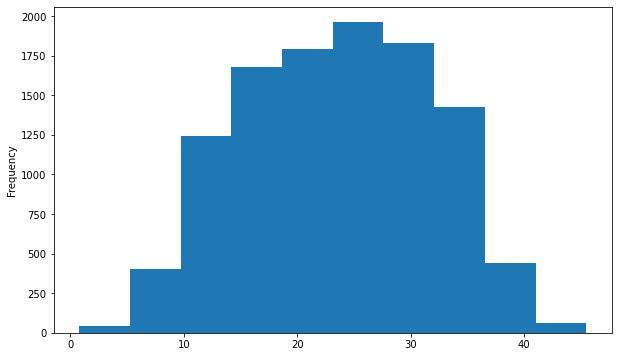

In [20]:
df_bike['atemp'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

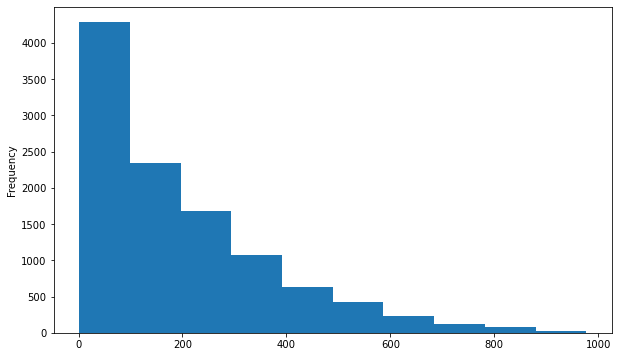

In [21]:
df_bike['count'].plot(kind='hist')

Text(0.5, 1.0, 'bike demand by hour')

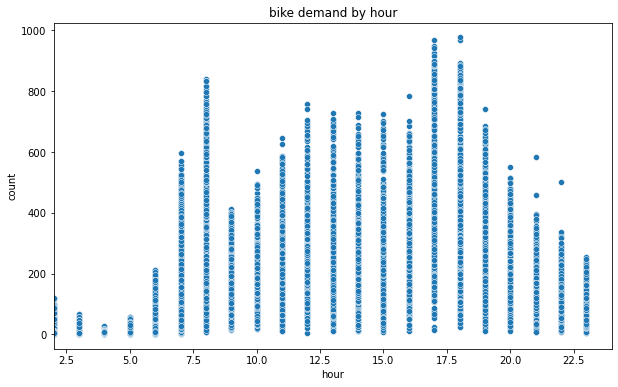

In [22]:
#PLOTTING
sns.scatterplot(data=df_bike, x='hour', y='count')  #first without “hue”
plt.xlim(2,24)
plt.title('bike demand by hour')

[Text(0.5, 1.0, 'Count of bikes by hour during working days')]

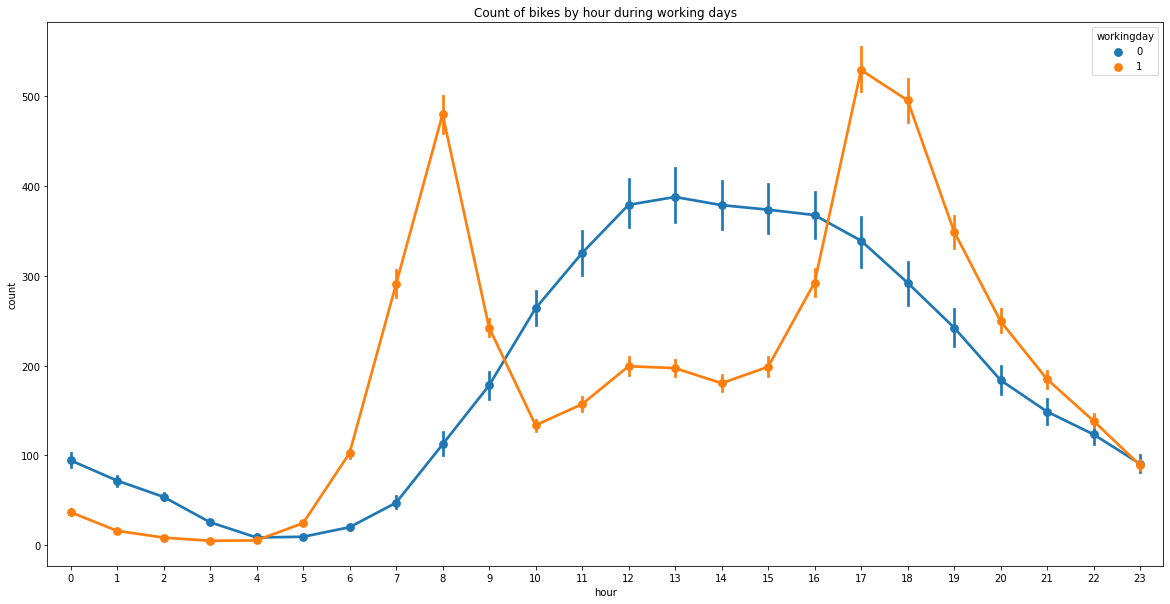

In [23]:
#PLOTTING
import matplotlib.pyplot as plt


fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df_bike, x='hour', y='count', hue='workingday', ax=ax, figsize=(20,10))
ax.set(title='Count of bikes by hour during working days')

In [24]:
#df_bike.loc[1,'peak_m'] = df_bike[(df_bike['hour']>7)&(df_bike['hour']<9)]

#Creating a dummy column for the peak hours
conditions = [
    (df_bike['hour']>7) & (df_bike['hour'] <9),
    (df_bike['hour']>17) & (df_bike['hour'] <19),
]
choices = [1, 1]
df_bike['peak_m'] = np.select(conditions, choices, default=0)
#print(df_bike)

[Text(0.5, 1.0, 'Count of bikes by windspeed level')]

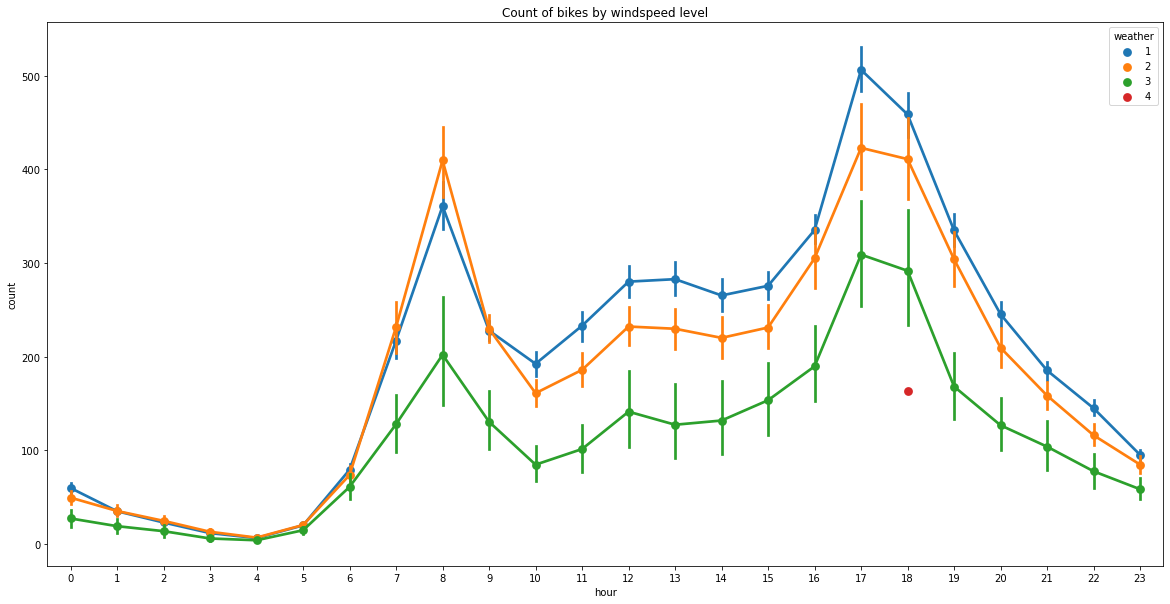

In [25]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df_bike, x='hour', y='count', ax=ax, hue='weather', figsize=(20,10))
ax.set(title='Count of bikes by windspeed level')

Text(0.5, 1.0, 'bike demand by month')

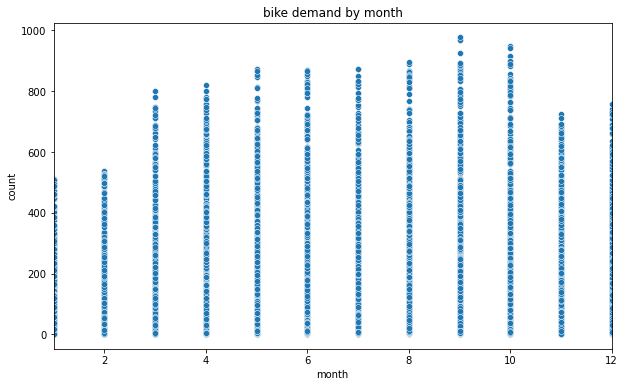

In [26]:
#PLOTTING
sns.scatterplot(data=df_bike, x='month', y='count')  #first without “hue”
plt.xlim(1,12)
plt.title('bike demand by month')

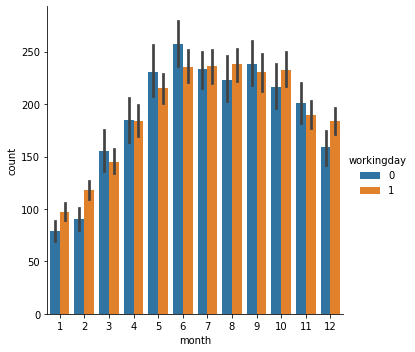

In [27]:
sns.catplot(x="month", y="count", hue="workingday", kind="bar", data=df_bike)

Text(0.5, 1.0, 'Bike demand by month')

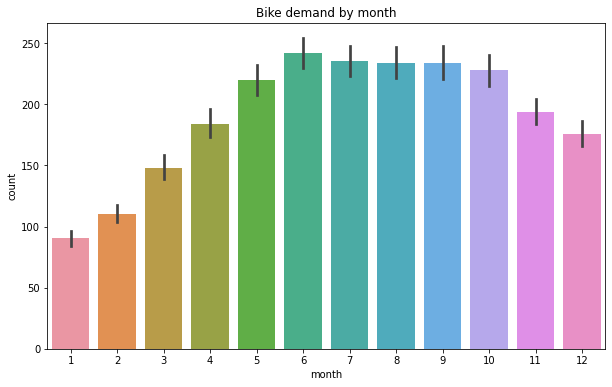

In [28]:
sns.barplot(data=df_bike, x='month', y='count') 
plt.title('Bike demand by month')

Text(0.5, 1.0, 'Bike demand by workingday')

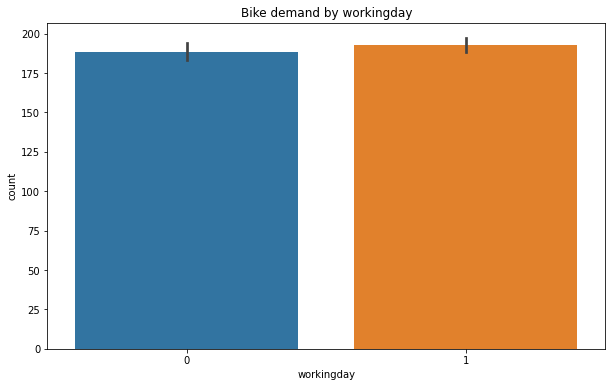

In [29]:
sns.barplot(data=df_bike, x='workingday', y='count') 
plt.title('Bike demand by workingday')

In [30]:
df_bike['wind']=pd.cut(df_bike['windspeed'], bins=10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df_bike.value_counts('wind')


wind
2     4083
3     2827
4     1540
1     1313
5      696
6      280
7      107
8       31
9        6
10       3
dtype: int64

In [32]:
df_bike.groupby('wind')["count"].mean() #windspeed and bikedemand don't have a linear relationship. 
#wind^2 should be in the model


wind
1     161.101295
2     175.135685
3     208.839406
4     212.375974
5     222.785920
6     205.103571
7     209.906542
8     170.225806
9     109.000000
10    181.333333
Name: count, dtype: float64

In [33]:
df_bike.groupby('wind')["windspeed"].mean()

wind
1      0.000000
2      8.371465
3     14.844866
4     20.045199
5     25.750487
6     31.175603
7     36.420636
8     42.547377
9     47.334383
10    55.330833
Name: windspeed, dtype: float64

[Text(0.5, 1.0, 'Count of bikes by hour during working days')]

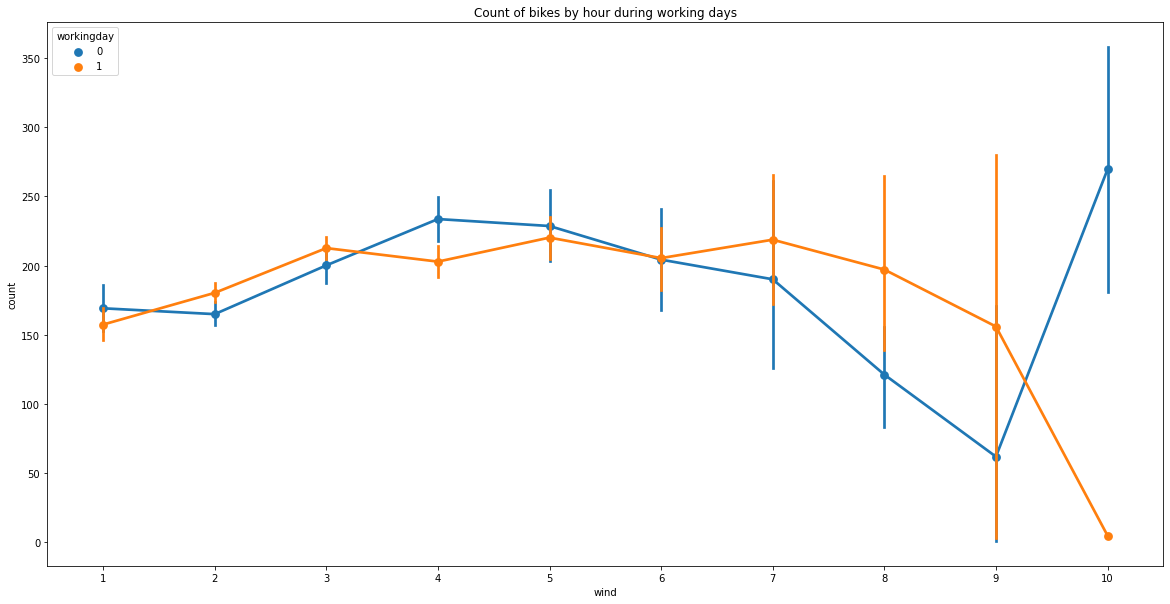

In [34]:
#PLOTTING
import matplotlib.pyplot as plt


fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df_bike, x='wind', y='count', hue='workingday', ax=ax, figsize=(20,10))
ax.set(title='Count of bikes by hour during working days')

[Text(0.5, 1.0, 'Count of bikes by hour and season')]

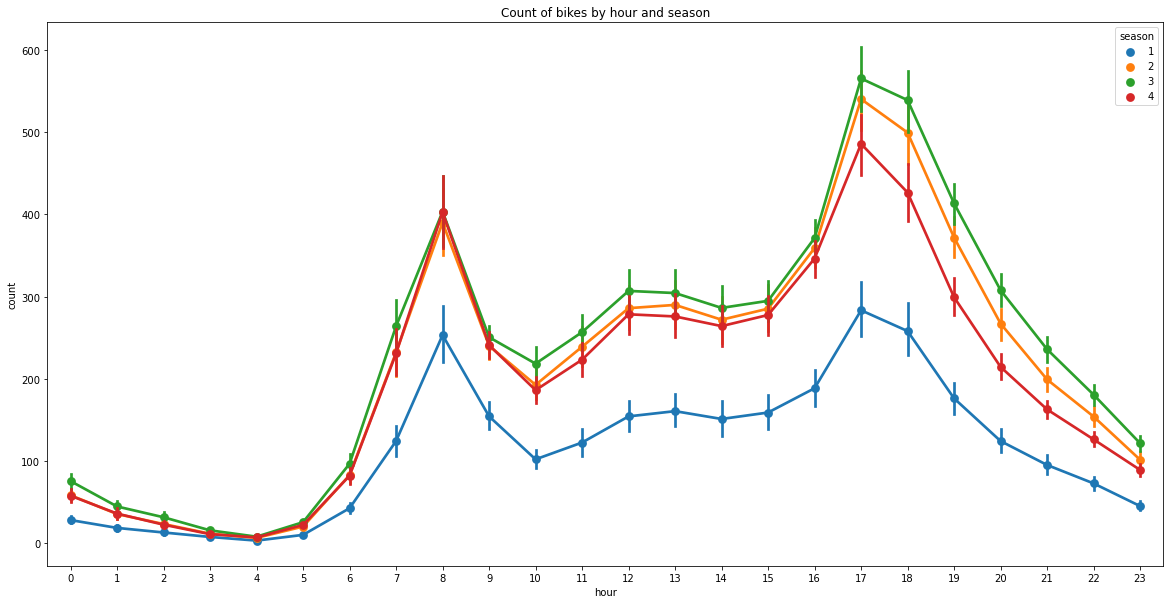

In [35]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df_bike, x='hour', y='count', hue='season', ax=ax, figsize=(20,10))
ax.set(title='Count of bikes by hour and season')

Text(0.5, 1.0, 'bike demand by tempreture')

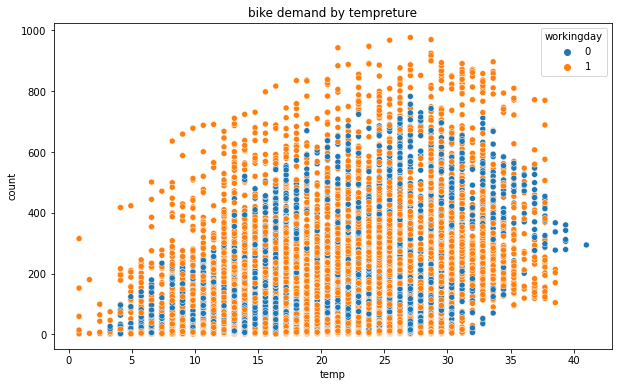

In [36]:
sns.scatterplot(data=df_bike, x='temp', y='count', hue='workingday')  #first without “hue”
plt.title('bike demand by tempreture')

Text(0.5, 1.0, 'bike demand by windspeed')

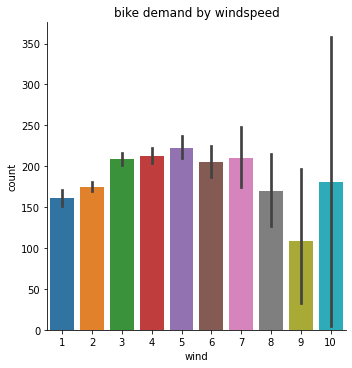

In [37]:
sns.catplot(x="wind", y="count", kind="bar", data=df_bike)
plt.title('bike demand by windspeed')

In [38]:
df_bike['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0.5, 1.0, 'bike demand by month')

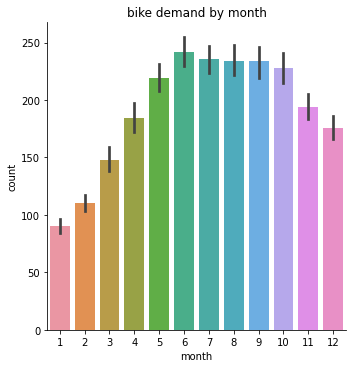

In [39]:
sns.catplot(x="month", y="count", kind="bar", data=df_bike)
plt.title('bike demand by month')

<AxesSubplot:>

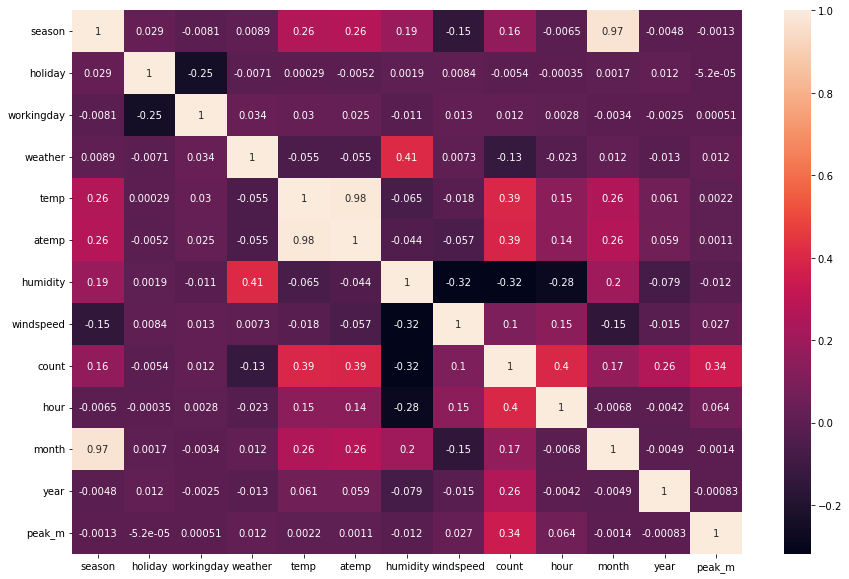

In [40]:
#Heatmap to decide which features to include in the model
corr=df_bike.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

[Text(0.5, 1.0, 'Relation btw humidity and users')]

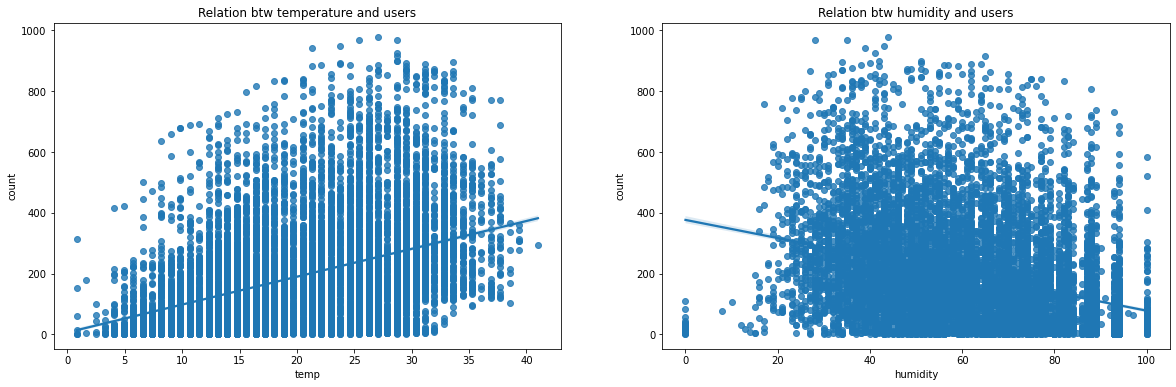

In [41]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(data=df_bike, x='temp', y='count', ax=ax1)
ax1.set(title='Relation btw temperature and users')
sns.regplot(data=df_bike, x='humidity', y='count', ax=ax2)
ax2.set(title='Relation btw humidity and users')

[Text(0.5, 1.0, 'Theoretical quintiles')]

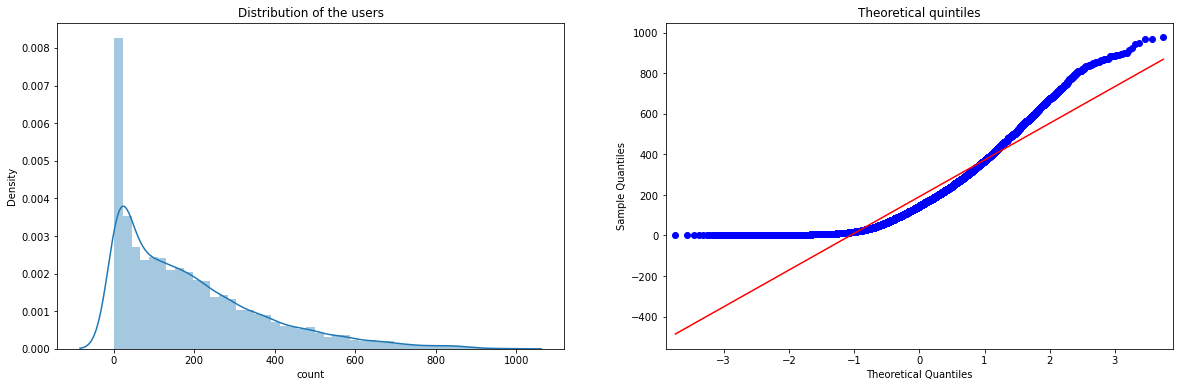

In [42]:

from statsmodels.graphics.gofplots import qqplot
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df_bike['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df_bike['count'], ax=ax2, line='s')
ax2.set(title='Theoretical quintiles')

In [43]:
#log transformation of count
df_bike['logcount']=np.log(df_bike['count'])

[Text(0.5, 1.0, 'Theoretical quintiles')]

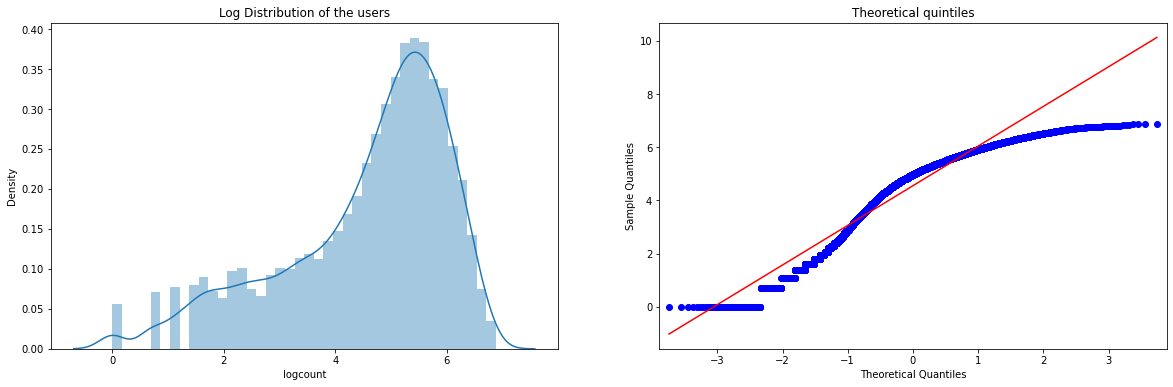

In [44]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df_bike['logcount'], ax=ax1)
ax1.set(title='Log Distribution of the users')
qqplot(df_bike['logcount'], ax=ax2, line='s')
ax2.set(title='Theoretical quintiles')

In [45]:
#2.2 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = df_bike[['datetime', 'season', 'weather', 'workingday', 'temp', 'humidity', 'hour', 'peak_m']]
y = df_bike['count']
X


,datetime,season,weather,workingday,temp,humidity,hour,peak_m
0,2011-01-01 00:00:00,1,1,0,9.84,81,0,0
1,2011-01-01 01:00:00,1,1,0,9.02,80,1,0
2,2011-01-01 02:00:00,1,1,0,9.02,80,2,0
3,2011-01-01 03:00:00,1,1,0,9.84,75,3,0
4,2011-01-01 04:00:00,1,1,0,9.84,75,4,0
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,1,1,15.58,50,19,0
10882,2012-12-19 20:00:00,4,1,1,14.76,57,20,0
10883,2012-12-19 21:00:00,4,1,1,13.94,61,21,0
10884,2012-12-19 22:00:00,4,1,1,13.94,61,22,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)
X_train.shape, y_train.shape

((8708, 8), (8708,))

In [49]:
X_test.shape

(2178, 8)

In [50]:
logy_train = np.log1p(y_train)
logy_test = np.log1p(y_test)

In [51]:
X_train.columns

Index(['datetime', 'season', 'weather', 'workingday', 'temp', 'humidity',
       'hour', 'peak_m'],
      dtype='object')

In [52]:
#FUTURE SELECTION
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression



In [57]:
#	season	weather	workingday	temp	humidity	hour	peak_m

In [59]:
def test_best_number_features(i):
    fs = SelectKBest(score_func=f_regression, k=i)
    fs.fit(X_train, logy_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_fs, logy_train)
    return model.score(X_test_fs, y_test)

In [60]:
lower_bound = 101

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

numerical_columns=['temp', 'humidity']
categorical_columns=['season', 'weather', 'workingday', 'hour', 'peak_m']


In [64]:
numerical_pipeline1 = Pipeline([
    ('num_scaler',StandardScaler()), 
    
])

In [65]:
poly_pipeline=Pipeline([
    ('num_scaler',StandardScaler()), 
    ('polynomial', PolynomialFeatures(degree= 2, include_bias=False,interaction_only=True)),
     
])

In [66]:
categorical_pipeline1 = Pipeline([
    ('categorical_ohe',OneHotEncoder(sparse=False,drop = 'first')),

])

In [67]:
column_transformer = ColumnTransformer([
    ('numerical_pip',numerical_pipeline1,['temp','humidity']),
    ('cat_pipeline',categorical_pipeline1,['season', 'weather', 'workingday', 'peak_m', 'hour']),#
    ('polynomial1', poly_pipeline, ['temp', 'season']),
    ('polynomial2', poly_pipeline, ['peak_m', 'temp']),
    ('polynomial3', poly_pipeline, ['peak_m', 'humidity']),
    ('polynomial4', poly_pipeline, ['peak_m', 'workingday'])
])


In [68]:
column_transformer.fit(X_train) #learn how to do the transforamtion
X_train_fe = column_transformer.transform(X_train) 
X_test_fe = column_transformer.transform(X_test) 

In [69]:
X_train_fe.shape

(8708, 45)

In [70]:
#REGRESSION


In [70]:
#Normalising the train and test
X_train_fe=(X_train_fe-X_train_fe.mean())/X_train_fe.std()
X_test_fe=(X_test_fe-X_test_fe.mean())/X_test_fe.std()

In [71]:
#Instatiate the model
m=LinearRegression()

In [72]:
#train the model
m.fit(X_train_fe, logy_train)

LinearRegression()

In [73]:
#coefficients
m.coef_, m.intercept_

(array([-3.91061016e+12,  2.43374434e+10, -1.24698482e+11, -2.49396963e+11,
        -3.74095445e+11, -1.82007970e-02, -3.34294772e-01, -1.87410805e-01,
        -7.68634514e+10,  2.88330831e+11, -3.49598054e-01, -6.29968099e-01,
        -9.53475279e-01, -1.10799889e+00, -5.16939639e-01,  1.93535455e-01,
         7.54037423e-01, -3.46792691e+08,  9.46137706e-01,  7.42954044e-01,
         7.95228108e-01,  9.11179914e-01,  8.83465227e-01,  8.41309915e-01,
         8.67439526e-01,  1.02936172e+00,  1.28619345e+00, -3.46792691e+08,
         1.07390538e+00,  8.89839000e-01,  7.25943645e-01,  5.97243037e-01,
         3.58940023e-01,  1.95537228e+12,  1.38846629e+11, -5.74903307e-02,
        -2.77343540e+10,  1.95523789e+12, -7.39014293e-03, -2.78570454e+10,
        -2.43374434e+10,  4.23645608e-03, -2.46639758e+10,  3.58291463e+10,
         9.82996068e-02]),
 307276175729.88184)

In [74]:
#3. Evaluate the model
round(m.score(X_train_fe, logy_train), 3)

0.817

In [75]:
m.score(X_test_fe, logy_test)

-4.316183773526141e+19

In [77]:
logy_pred = m.predict(X_test_fe)

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, logy_pred)

9195707920.003984

In [79]:
from sklearn.model_selection import cross_val_score
cross_val_score(m, X_train_fe, logy_train,cv = 5).mean()

-1.9291607219388627e+17

In [80]:
X_train['ypred'] = m.predict(X_train_fe)
X_train['ytrue'] = logy_train

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 8831 to 338
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    8708 non-null   datetime64[ns]
 1   season      8708 non-null   int64         
 2   weather     8708 non-null   int64         
 3   workingday  8708 non-null   int64         
 4   temp        8708 non-null   float64       
 5   humidity    8708 non-null   int64         
 6   hour        8708 non-null   int64         
 7   peak_m      8708 non-null   int64         
 8   ypred       8708 non-null   float64       
 9   ytrue       8708 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 748.3 KB


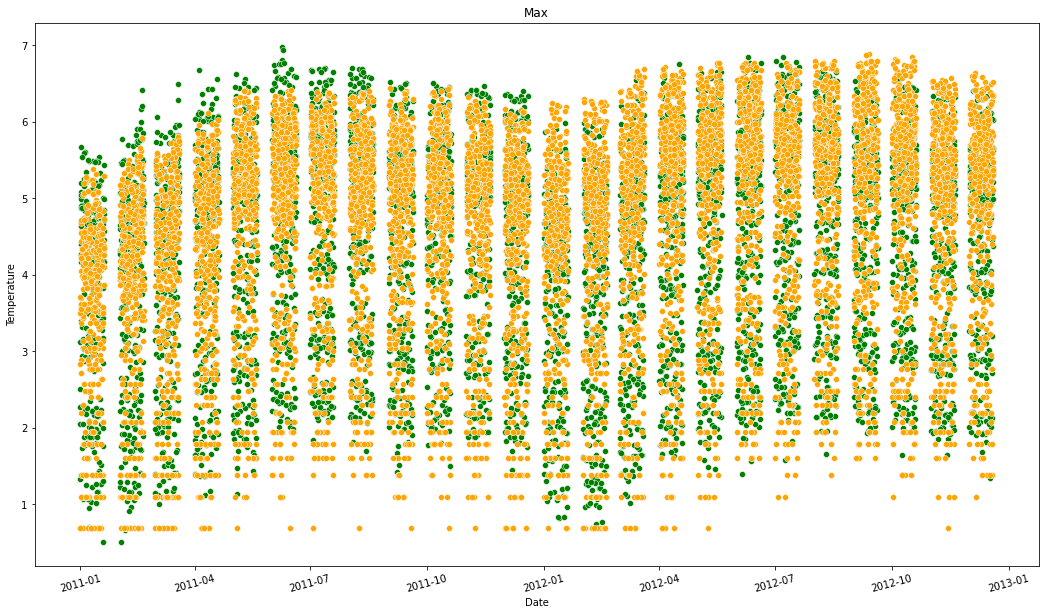

In [82]:
plt.figure(figsize=(18,10))
sns.scatterplot(data =X_train, x = 'datetime', y = 'ypred', color = 'green')
sns.scatterplot(data =X_train, x = 'datetime', y = 'ytrue', color = 'orange' )
plt.xticks(rotation=15)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Max')
plt.show()